In [2]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import math
import seaborn as sns
os.getcwd()
os.chdir("C:\\Users\\Ximena\\OneDrive - Universidad de los andes\\Despliegue de soluciones ánaliticas\\Proyecto\\fraud test.csv")
df = pd.read_csv("fraud test.csv")
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])

C:\Users\Ximena\AppData\Local\Temp\ipykernel_48336\403742540.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])


In [3]:
df.describe()

,Unnamed: 0,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,2020-10-02 01:53:55.673389056,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
min,0.000000,2020-06-21 12:14:00,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,2020-08-09 06:10:00,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,2020-10-03 00:59:00,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,2020-12-01 03:02:30,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,2020-12-31 23:59:00,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000
std,160422.401459,NaN,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008


In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Text(0.5, 1.0, 'Faltantes de la base de datos')

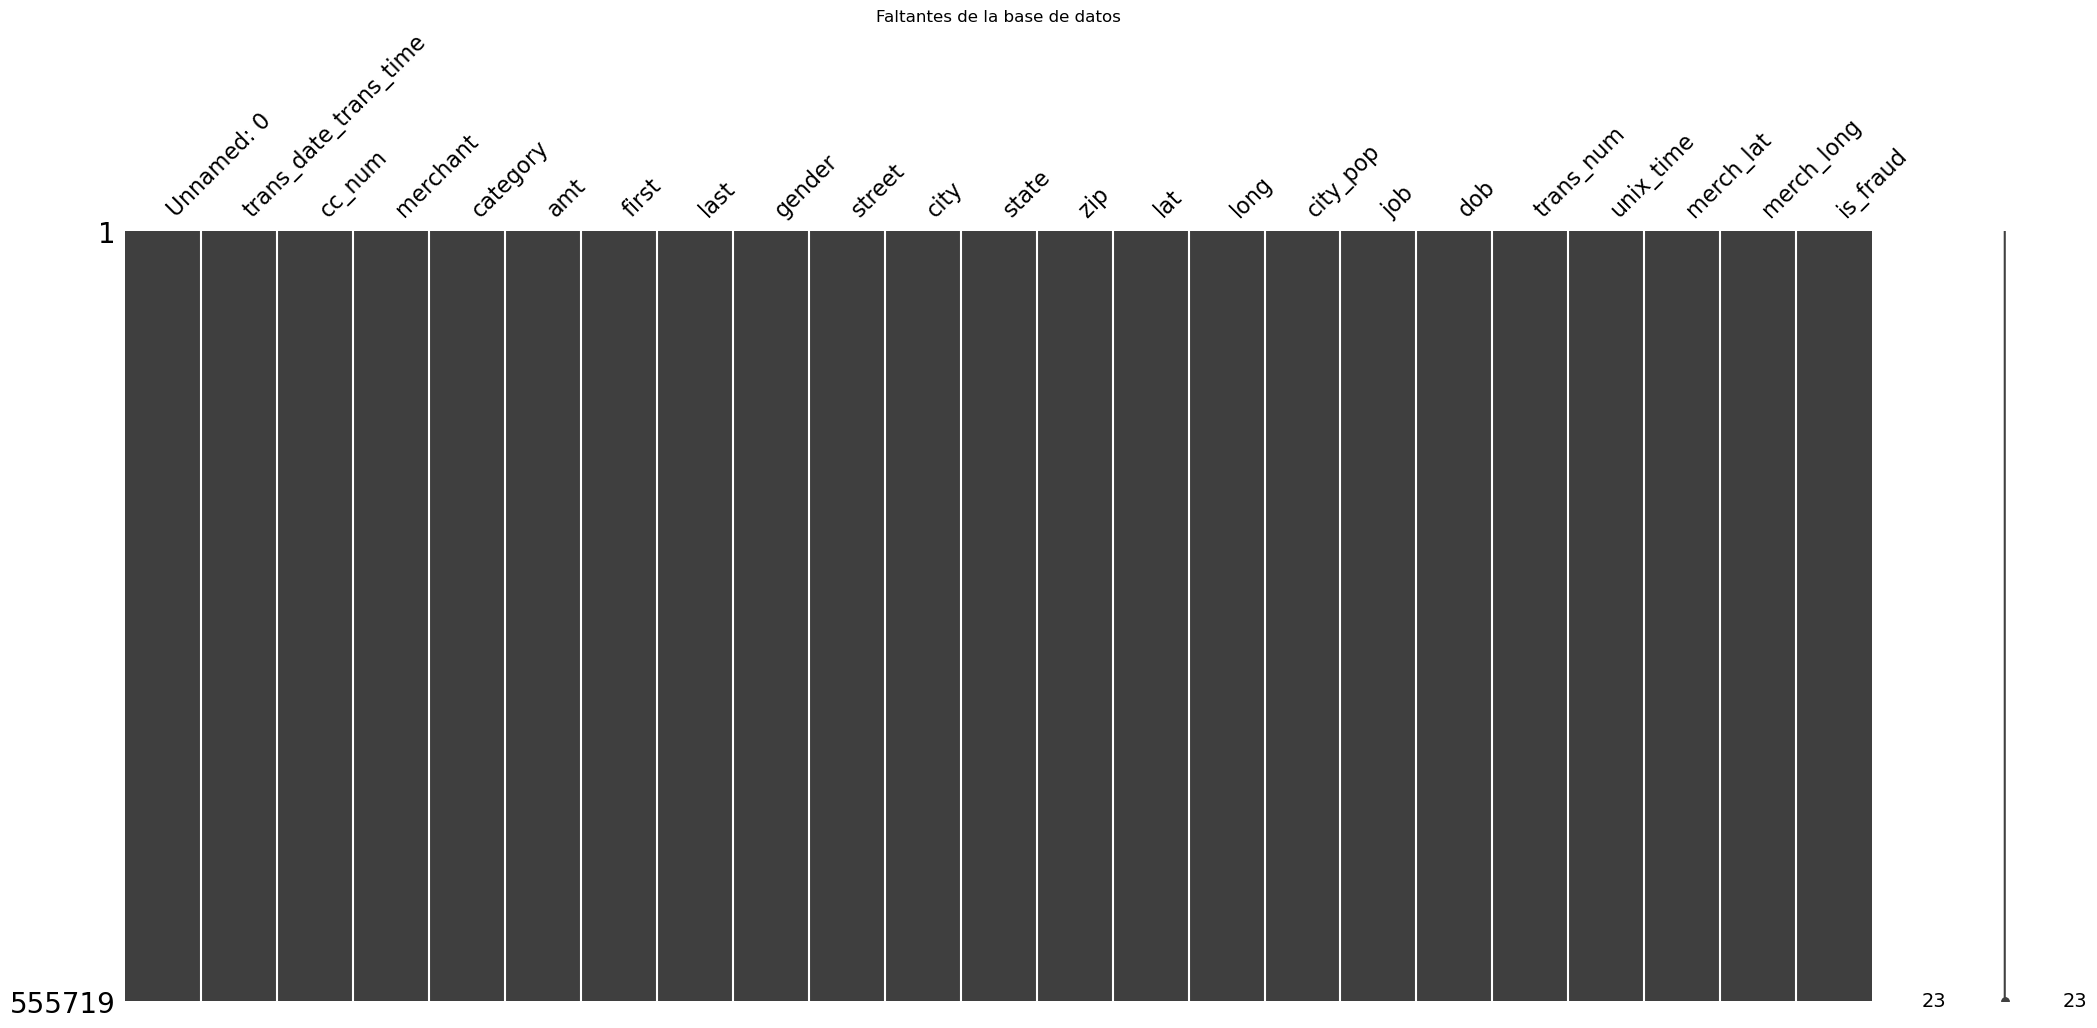

In [5]:
import missingno as msno
#Analizamos los datos faltantes de forma gráfica
msno.matrix(df)
plt.title('Faltantes de la base de datos')

In [6]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
data = df[['merchant','category','amt','gender','street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud']]

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_dataframe(df, min_freq=0.05):
    # Separar las variables numéricas y categóricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Gráficos de variables numéricas (histogramas)
    if len(numeric_cols) > 0:
        num_rows = int(np.ceil(np.sqrt(len(numeric_cols))))
        num_cols = int(np.ceil(len(numeric_cols) / num_rows))
        
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
        fig.suptitle('Histogramas de Variables Numéricas', fontsize=16)
        axes = axes.flatten()
        
        for i, col in enumerate(numeric_cols):
            axes[i].hist(df[col].dropna(), bins=15, color='slategray', edgecolor='grey')
            axes[i].set_title(col, fontsize=12)
            axes[i].set_xlabel('Valor', fontsize=10)
            axes[i].set_ylabel('Frecuencia', fontsize=10)
        
        for i in range(len(numeric_cols), len(axes)):
            fig.delaxes(axes[i])  # Eliminar ejes no usados
            
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    # Gráficos de variables categóricas (gráficos de pie en una cuadrícula de 2 columnas)
    if len(categorical_cols) > 0:
        num_rows = int(np.ceil(len(categorical_cols) / 2))
        fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
        fig.suptitle('Gráficos de Variables Categóricas (80% o Más)', fontsize=16)
        axes = axes.flatten()

        for i, col in enumerate(categorical_cols):
            data = df[col].value_counts(normalize=True)  # Calcular proporciones
            data = data[data >= min_freq]  # Filtrar categorías con frecuencia mínima
            data_80 = data[data.cumsum() <= 0.8]  # Filtrar categorías que sumen hasta el 80%
            if data_80.sum() < 0.8:  # Incluir categoría "Otros" si es necesario
                data_80["Otros"] = 1 - data_80.sum()
            
            # Crear gráfico de pie en el eje correspondiente
            axes[i].pie(data_80, labels=data_80.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
            axes[i].set_title(col, fontsize=12)
        
        # Eliminar ejes no usados
        for i in range(len(categorical_cols), len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


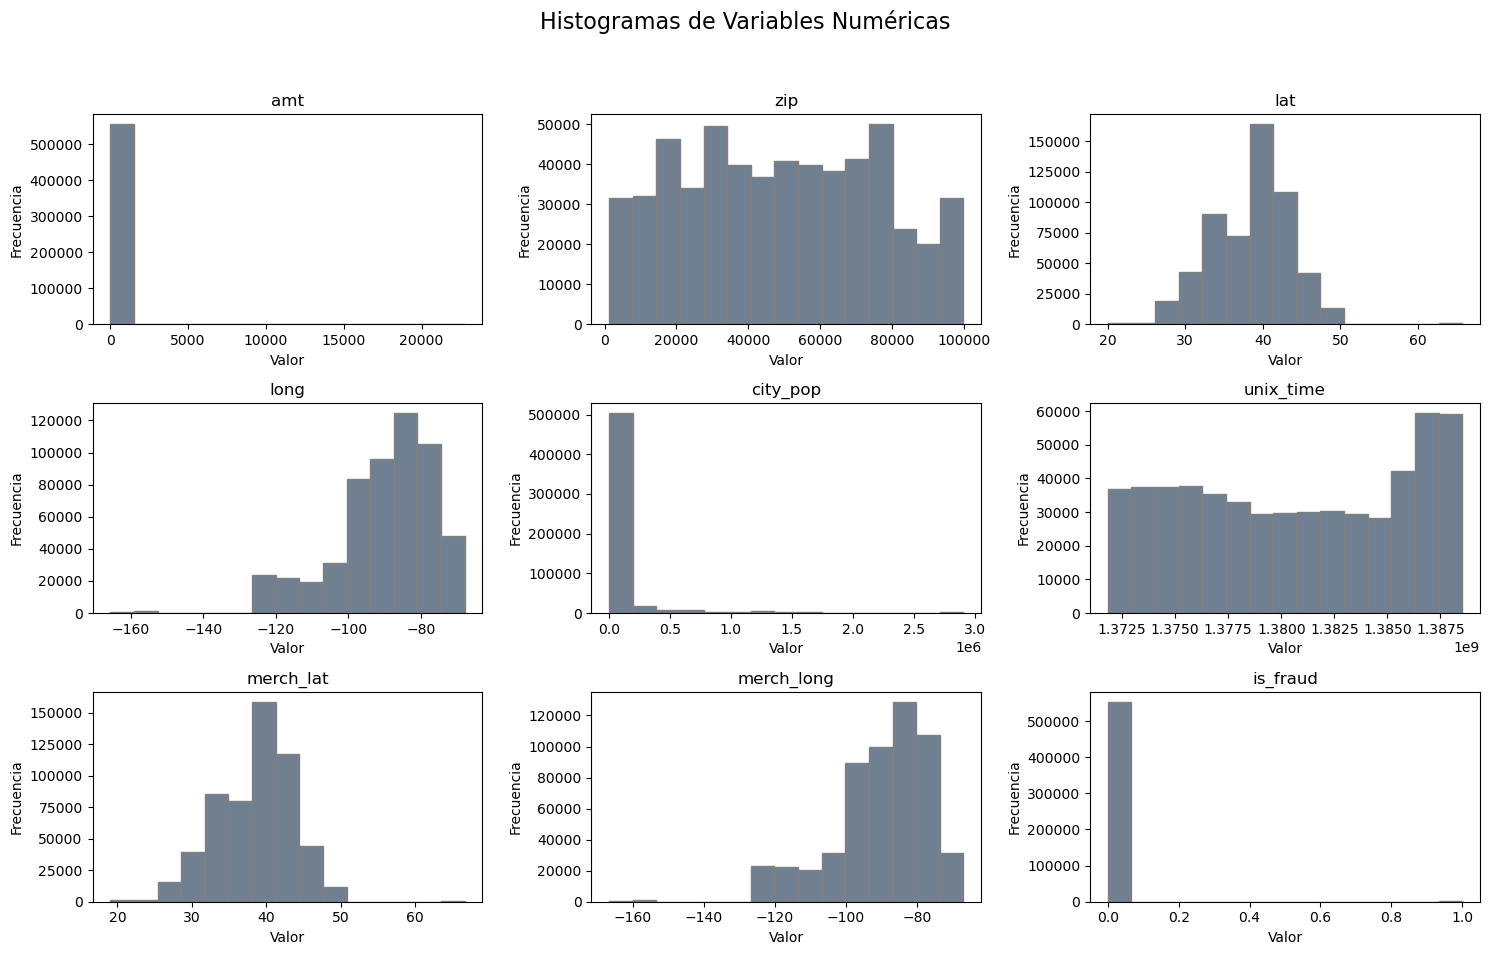

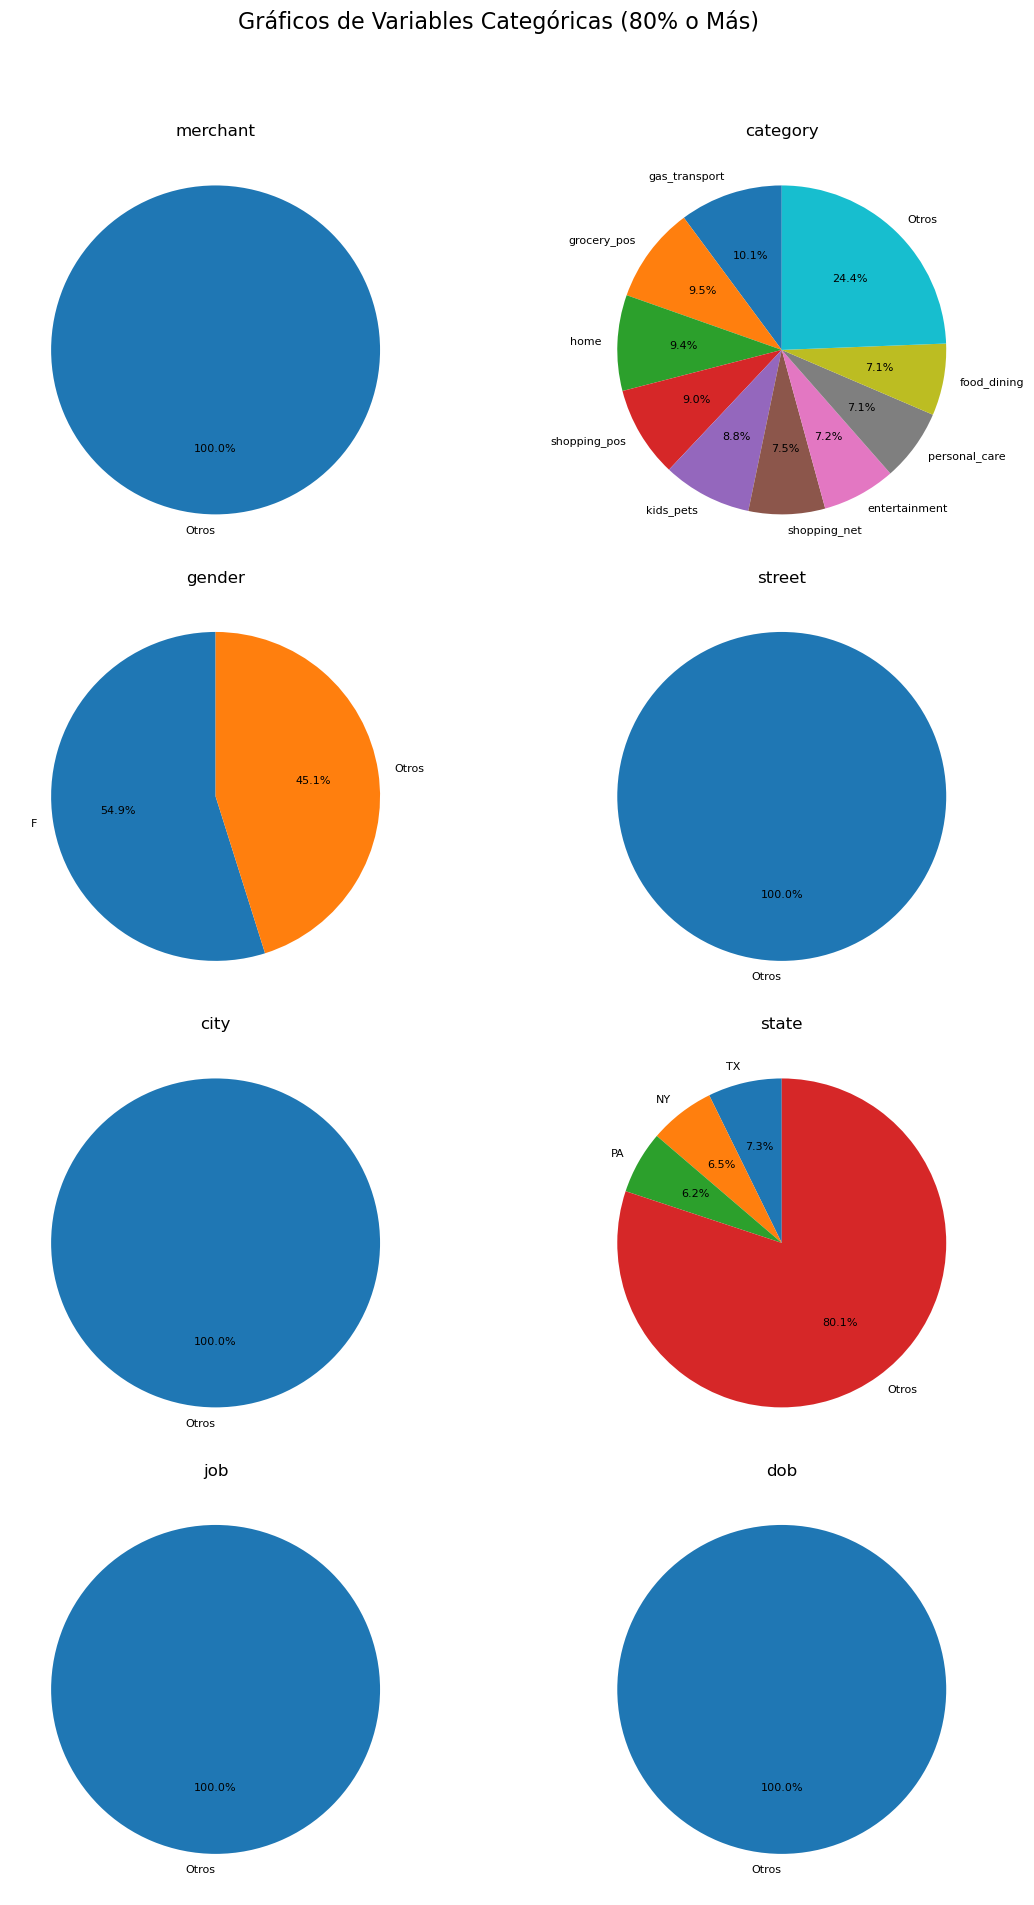

In [9]:
plot_dataframe(data)

In [10]:
data=pd.DataFrame(data)

In [11]:
data.describe()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [15]:
data

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,25/07/1987,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,06/07/1955,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,13/02/1966,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,27/12/1999,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,29/11/1981,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,15/12/1965,1388534364,44.470525,-117.080888,0


In [26]:
df[df['is_fraud']==1].groupby(['is_fraud','merchant'])['is_fraud'].count().sort_values(ascending=False)

is_fraud  merchant                                  
1         fraud_Romaguera, Cruickshank and Greenholt    18
          fraud_Lemke-Gutmann                           18
          fraud_Mosciski, Ziemann and Farrell           18
          fraud_Heathcote, Yost and Kertzmann           17
          fraud_Schultz, Simonis and Little             17
                                                        ..
          fraud_Romaguera and Sons                       1
          fraud_Mante, Luettgen and Hackett              1
          fraud_Kautzer and Sons                         1
          fraud_Kutch-Wilderman                          1
          fraud_Abbott-Rogahn                            1
Name: is_fraud, Length: 557, dtype: int64

In [1]:
pip install dash plotly pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Datos simulados
data = {
    'amount': [100, 250, 3000, 1500, 20000],
    'risk_level': ['High', 'Moderate', 'Low', 'Low', 'Moderate'],
    'latitude': [40.7128, 40.706, 40.735, 40.751, 40.762],
    'longitude': [-74.0060, -73.980, -73.987, -73.975, -74.001],
    'date': ['2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-05']
}
df = pd.DataFrame(data)

# Inicializar la app Dash
app = dash.Dash(__name__)

# Layout de la aplicación
app.layout = html.Div([
    html.H1("Dashboard de detección de fraude"),

    # Filtros
    html.Div([
        dcc.DatePickerSingle(id='date-picker', date='2024-10-01'),
        dcc.Input(id='amount-range', type='number', placeholder="Monto máximo", value=20000),
        dcc.Dropdown(
            id='risk-dropdown',
            options=[{'label': level, 'value': level} for level in df['risk_level'].unique()],
            placeholder="Nivel de riesgo",
            multi=True
        )
    ], style={'display': 'flex', 'justify-content': 'space-around'}),

    # Contadores de riesgo
    html.Div([
        html.Div("22 Altamente probables", style={'color': 'red', 'fontSize': 20}),
        html.Div("404 Moderadamente probables", style={'color': 'orange', 'fontSize': 20}),
        html.Div("1540 Poco probables", style={'color': 'yellow', 'fontSize': 20}),
        html.Div("5603 Poco probables", style={'color': 'green', 'fontSize': 20}),
    ], style={'display': 'flex', 'flexDirection': 'column', 'alignItems': 'center', 'width': '20%'}),

    # Tabla y mapa
    html.Div([
        dcc.Graph(id='fraud-map'),
        html.Table([
            html.Tr([html.Th(col) for col in df.columns]),
            *[html.Tr([html.Td(df.iloc[i][col]) for col in df.columns]) for i in range(len(df))]
        ], id='fraud-table')
    ], style={'display': 'flex', 'justify-content': 'space-around'}),

    # Gráfico de barras
    dcc.Graph(id='fraud-bar')
])

# Callbacks para actualizar el mapa y gráfico de barras según filtros
@app.callback(
    [Output('fraud-map', 'figure'), Output('fraud-bar', 'figure')],
    [Input('date-picker', 'date'), Input('amount-range', 'value'), Input('risk-dropdown', 'value')]
)
def update_dashboard(date, max_amount, risk_levels):
    filtered_df = df[df['amount'] <= max_amount]
    if risk_levels:
        filtered_df = filtered_df[filtered_df['risk_level'].isin(risk_levels)]
    
    # Mapa
    map_fig = px.scatter_mapbox(
        filtered_df, lat='latitude', lon='longitude', color='risk_level',
        size='amount', zoom=10, mapbox_style="open-street-map"
    )

    # Gráfico de barras
    bar_fig = px.bar(
        filtered_df, x='date', y='amount', color='risk_level', title="Fraude por riesgo"
    )

    return map_fig, bar_fig

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)
